# Kodekladd

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)

In [2]:
#Useful functions

def OLS_parameters(X, y):
    return (np.linalg.pinv(X.T @ X) @ X.T ) @ y

def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = 1.0
    for i in range(1,p+1):
        X[:, i] = x**i
    return X

def R2(y_data, y_model):
    # from week 34 lecture notes
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

def MSE(y_data, y_model):   
    # from week 34 lecture notes
    return np.mean((y_data - y_model) ** 2)

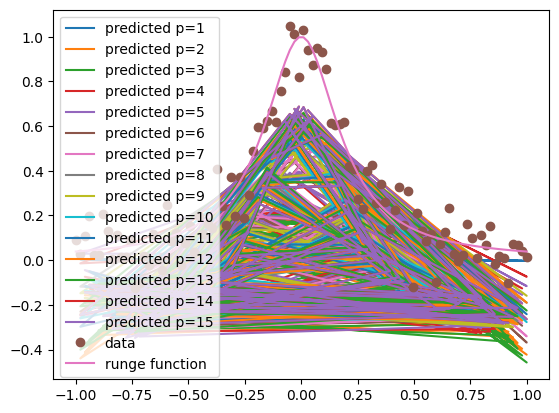

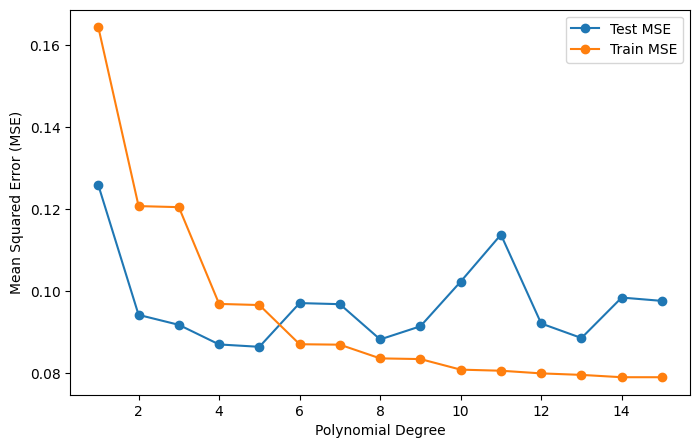

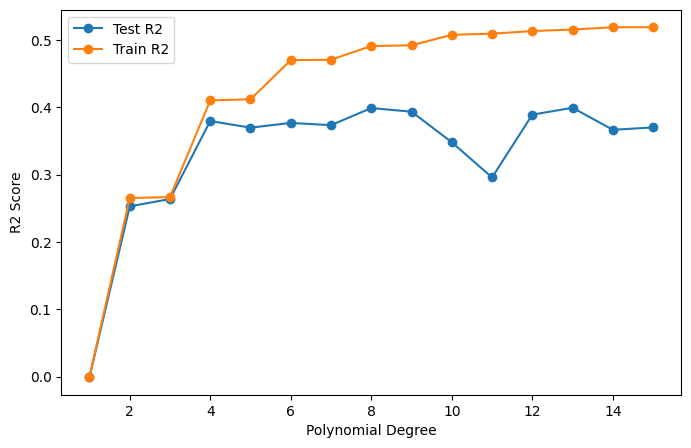

In [3]:
#Analysis fixed number of data points, varying polynomial degree

from functions import runge
n = 100

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
degrees = range(1,16)

mse_test_list = []
mse_train_list = []

r2_test_list = []
r2_train_list = []

theta = []

for p in degrees:
    # X_train = polynomial_features(x_train, i)
    # X_test = polynomial_features(x_test, i)
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta = OLS_parameters(X_train_s, y_train)
    theta.append(beta)
    y_test_tilde = X_test_s @ beta
    y_train_tilde = X_train_s @ beta
    plt.plot(x_train, y_train_tilde, label=f'predicted p={p}')

    mse_test = MSE(y_test, y_test_tilde)
    mse_train = MSE(y_train, y_train_tilde)
    mse_test_list.append(mse_test)
    mse_train_list.append(mse_train)

    r2_test = R2(y_test, y_test_tilde)
    r2_train = R2(y_train, y_train_tilde)
    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)

plt.plot(x, y, 'o', label='data')
plt.plot(x, runge(x), label='runge function')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(degrees, r2_test_list, label='Test R2', marker='o')
plt.plot(degrees, r2_train_list, label='Train R2', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

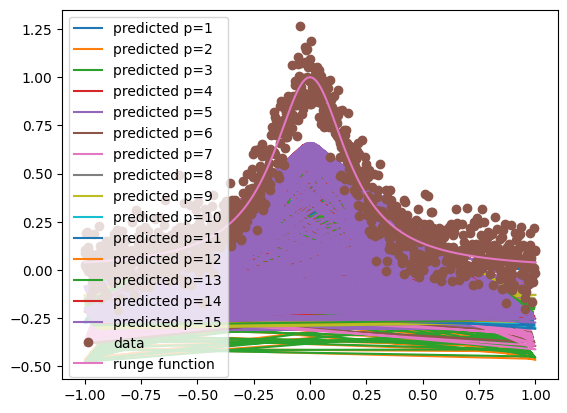

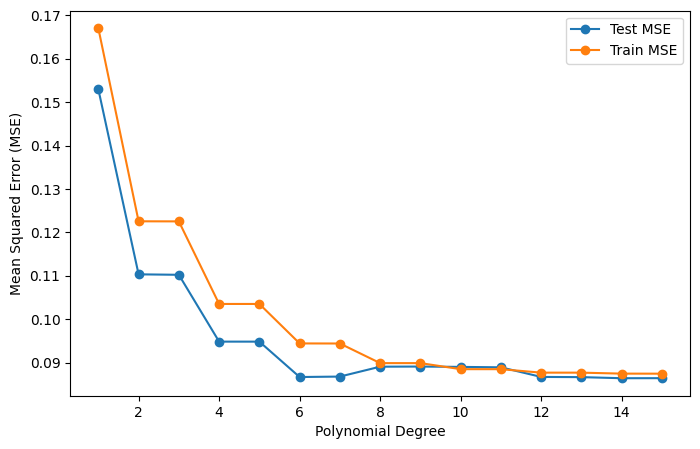

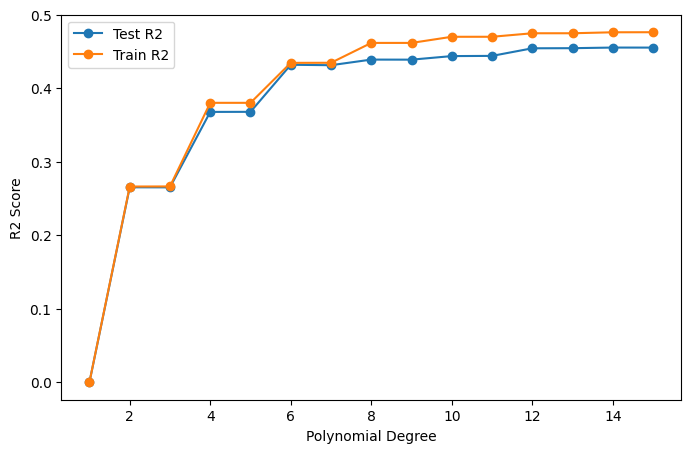

In [4]:
#Analysis increasing number of data points, same procedure as before

from functions import runge
n = 1000

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
degrees = range(1,16)

mse_test_list = []
mse_train_list = []

r2_test_list = []
r2_train_list = []

theta = []

for p in degrees:
    # X_train = polynomial_features(x_train, i)
    # X_test = polynomial_features(x_test, i)
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta = OLS_parameters(X_train_s, y_train)
    theta.append(beta)
    y_test_tilde = X_test_s @ beta
    y_train_tilde = X_train_s @ beta
    plt.plot(x_train, y_train_tilde, label=f'predicted p={p}')

    mse_test = MSE(y_test, y_test_tilde)
    mse_train = MSE(y_train, y_train_tilde)
    mse_test_list.append(mse_test)
    mse_train_list.append(mse_train)

    r2_test = R2(y_test, y_test_tilde)
    r2_train = R2(y_train, y_train_tilde)
    r2_test_list.append(r2_test)
    r2_train_list.append(r2_train)

plt.plot(x, y, 'o', label='data')
plt.plot(x, runge(x), label='runge function')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(degrees, r2_test_list, label='Test R2', marker='o')
plt.plot(degrees, r2_train_list, label='Train R2', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.legend()
plt.show()